In [1]:
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating dataset

In [2]:
x = [random.uniform(-10, 10) for _ in range(10000)] #It is the x-value for the function which lies in the range (-10,10)
df_1=pd.DataFrame(x) # The data generated value is being transferred into dataframe
df_1.head() #To get the 5 starting values of dataframe

,0
0,5.955971
1,-0.327038
2,-4.037751
3,8.869686
4,9.350782


In [3]:
y=[random.uniform(-10,10) for _ in range(10000)] #It is the y-value for the function which lies in the range (-10,10)
df_2=pd.DataFrame(y)  # The data generated value is being transferred into dataframe
df_2.head() #To get the 5 starting values of dataframe

,0
0,-2.023012
1,-7.936002
2,6.441583
3,5.118073
4,3.564394


In [4]:
f=[]
for i in range(10000):
    a=-abs(math.sin(x[i])*math.cos(y[i])*math.exp(abs(1-(math.sqrt(math.pow(x[i],2)+math.pow(y[i],2)))/math.pi))) # Function defined
    f.append(a) #Collecting all the values in f
df_3=pd.DataFrame(f) #Forming the dataframe for the output
df_3.head() #To get the 5 starting values of dataframe

,0
0,-0.382610
1,-0.121332
2,-3.190174
3,-1.992415
4,-0.599611


In [5]:
df=pd.concat([df_1,df_2,df_3],axis=1) #Combining all the dataframes forming one final dataframe having 2 i/ps and 1 o/p
df.columns=['x','y','f']
df.head() #To get the 5 starting values of dataframe

,x,y,f
0,5.955971,-2.023012,-0.382610
1,-0.327038,-7.936002,-0.121332
2,-4.037751,6.441583,-3.190174
3,8.869686,5.118073,-1.992415
4,9.350782,3.564394,-0.599611


In [6]:
df.tail() #To get the 5 last values of dataframe

,x,y,f
9995,-2.418320,9.810984,-5.624700
9996,4.268007,-8.032746,-1.068467
9997,-0.727410,-4.433515,-0.281407
9998,-6.295889,6.815454,-0.077201
9999,1.962676,-5.253318,-1.043438


In [7]:
df.describe() #Describibg the dataframe 

,x,y,f
count,10000.000000,10000.000000,10000.000000
mean,-0.024817,-0.065471,-2.412683
std,5.831132,5.747517,2.973883
min,-9.998966,-9.999405,-19.174606
25%,-5.136802,-5.055784,-3.139499
50%,-0.048284,-0.165986,-1.309670
75%,5.041549,4.947207,-0.515104
max,9.999255,9.989038,-0.000037


In [8]:
df.shape #To get the dimensions of the dataframe

(10000, 3)

In [9]:
df.to_excel('Assignment_1.xlsx',index=False) #Saving the data into excel file

# Reading data from excel file

In [10]:
data=pd.read_excel('Assignment_1.xlsx') #Read the excel file
data.head()

,x,y,f
0,5.955971,-2.023012,-0.382610
1,-0.327038,-7.936002,-0.121332
2,-4.037751,6.441583,-3.190174
3,8.869686,5.118073,-1.992415
4,9.350782,3.564394,-0.599611


In [11]:
data.tail()  #To get the 5 last values of dataframe

,x,y,f
9995,-2.418320,9.810984,-5.624700
9996,4.268007,-8.032746,-1.068467
9997,-0.727410,-4.433515,-0.281407
9998,-6.295889,6.815454,-0.077201
9999,1.962676,-5.253318,-1.043438


In [12]:
#Normalize the data between 0 and 1 
from sklearn.preprocessing import MinMaxScaler  
scaler=MinMaxScaler()
data_t=scaler.fit_transform(data.values)

In [13]:
#Split the data into inputs and output
X=data_t[:,0:-1]
Y=data_t[:,-1:]

In [14]:
X #X-values

array([[0.79781781, 0.39905023],
       [0.48363944, 0.10322979],
       [0.29808726, 0.82252469],
       ...,
       [0.46361906, 0.27845543],
       [0.1851703 , 0.84122906],
       [0.5981353 , 0.23744158]])

In [15]:
Y #Y-values

array([[0.9800479 ],
       [0.99367415],
       [0.83362667],
       ...,
       [0.98532584],
       [0.9959757 ],
       [0.94558409]])

In [16]:
#Dividing the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=0)

In [17]:
X_train.shape #To get the dimension of the training data

(8500, 2)

# Creating an ANN

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
#Creating an artificial neural network with 2 hidden layers
model=Sequential()
model.add(Dense(64,input_dim=2,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

In [20]:
print(model.summary()) #To get the summary of the ANN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,361
Trainable params: 3,361
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
#Training the neural network using Adam optimizer and MSE loss function
model.compile(optimizer='adam',loss='MSE')
history=model.fit(X_train,Y_train,epochs=100,validation_split=0.15)

Epoch 1/100
226/226 [==============================] - 2s 4ms/step - loss: 0.0973 - val_loss: 0.0168
Epoch 2/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0171 - val_loss: 0.0146
Epoch 3/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0154 - val_loss: 0.0170
Epoch 4/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0144 - val_loss: 0.0128
Epoch 5/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0137 - val_loss: 0.0141
Epoch 6/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0134 - val_loss: 0.0128
Epoch 7/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0129 - val_loss: 0.0147
Epoch 8/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0126 - val_loss: 0.0122
Epoch 9/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0124 - val_loss: 0.0127
Epoch 10/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0122 - val_lo

226/226 [==============================] - 1s 3ms/step - loss: 0.0081 - val_loss: 0.0101
Epoch 82/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0083 - val_loss: 0.0091
Epoch 83/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0081 - val_loss: 0.0089
Epoch 84/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0079 - val_loss: 0.0087
Epoch 85/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0080 - val_loss: 0.0094
Epoch 86/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0082 - val_loss: 0.0087
Epoch 87/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0079 - val_loss: 0.0099
Epoch 88/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0078 - val_loss: 0.0090
Epoch 89/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0080 - val_loss: 0.0090
Epoch 90/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0079 - val_loss: 

In [22]:
from sklearn.metrics import r2_score
Y_train_pre=model.predict(X_train)

266/266 [==============================] - 1s 2ms/step


In [23]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_train,Y_train_pre)
mse

0.008182996541447624

In [24]:
#R2 values for training data.
r2_train=r2_score(Y_train,Y_train_pre)
r2_train

0.6632878081692

In [25]:
Y_test_pre=model.predict(X_test) #Predict the outputs for testing dataset
r2_test=r2_score(Y_test,Y_test_pre) #Report R2 values for  the testing dataset.
r2_test

47/47 [==============================] - 0s 2ms/step


0.631507170522954

In [26]:
# Training the same network using RMSProp optimizer
model.compile(optimizer='RMSProp',loss='MSE')
history=model.fit(X_train,Y_train,epochs=100,validation_split=0.15)

Epoch 1/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0077 - val_loss: 0.0083
Epoch 2/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0077 - val_loss: 0.0089
Epoch 3/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0076 - val_loss: 0.0095
Epoch 4/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0076 - val_loss: 0.0080
Epoch 5/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0075 - val_loss: 0.0081
Epoch 6/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0075 - val_loss: 0.0088
Epoch 7/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0074 - val_loss: 0.0089
Epoch 8/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0075 - val_loss: 0.0085
Epoch 9/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0075 - val_loss: 0.0084
Epoch 10/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0074 - val_lo

226/226 [==============================] - 1s 3ms/step - loss: 0.0059 - val_loss: 0.0069
Epoch 82/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0058 - val_loss: 0.0073
Epoch 83/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0059 - val_loss: 0.0061
Epoch 84/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0058 - val_loss: 0.0064
Epoch 85/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0058 - val_loss: 0.0069
Epoch 86/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0057 - val_loss: 0.0067
Epoch 87/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0057 - val_loss: 0.0068
Epoch 88/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0057 - val_loss: 0.0077
Epoch 89/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0057 - val_loss: 0.0064
Epoch 90/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0057 - val_loss: 

In [27]:
from sklearn.metrics import r2_score
Y_train_pre=model.predict(X_train)

266/266 [==============================] - 1s 2ms/step


In [28]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_train,Y_train_pre)
mse

0.006227168454237248

In [29]:
#R2 values for training data.
r2_train=r2_score(Y_train,Y_train_pre)
r2_train

0.7437658040663295

In [30]:
Y_test_pre=model.predict(X_test)
r2_test=r2_score(Y_test,Y_test_pre)  #Report R2 values for  the testing dataset.
r2_test

47/47 [==============================] - 0s 2ms/step


0.7055342630446748

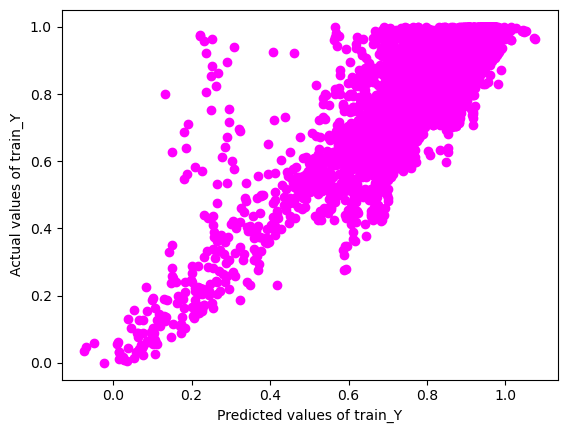

In [34]:
#Plot a graph between the predicted outputs and the true outputs for the training data
plt.scatter(Y_train_pre,Y_train,c='magenta')
plt.xlabel('Predicted values of train_Y')
plt.ylabel('Actual values of train_Y')
plt.show()

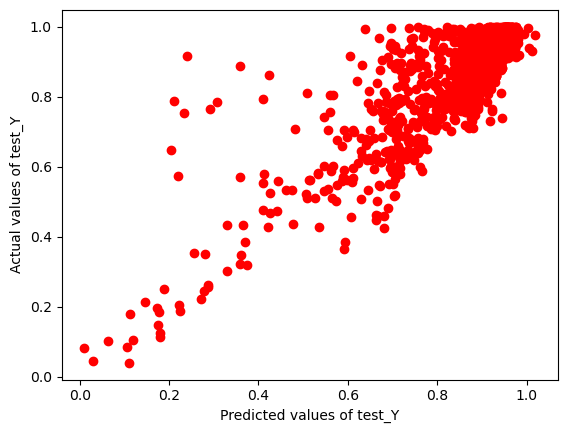

In [33]:
#Plot a graph between the predicted outputs and the true outputs for the testing data
plt.scatter(Y_test_pre,Y_test,c='red')
plt.xlabel('Predicted values of test_Y')
plt.ylabel('Actual values of test_Y')
plt.show()